In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [24]:
from pandas_datareader.data import DataReader

In [8]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [11]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [26]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [28]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,190.018929,186.680754,188.285754,188.366905,3.128506e+07,187.359845
std,20.277399,19.757869,20.049336,20.048064,1.336542e+07,20.693668
min,157.889999,150.240005,154.830002,155.149994,1.251390e+07,153.388489
25%,174.252495,171.707504,172.757504,172.745003,2.252265e+07,171.172527
50%,185.534996,181.634995,183.195000,183.875000,2.818570e+07,182.880539
75%,208.830006,205.442493,207.112499,207.412498,3.679378e+07,206.814682
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,232.070007


In [29]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2017-11-03 to 2018-11-02
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


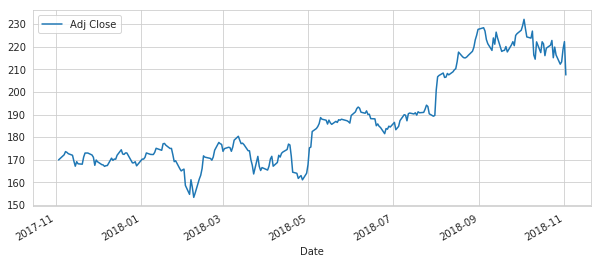

In [30]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

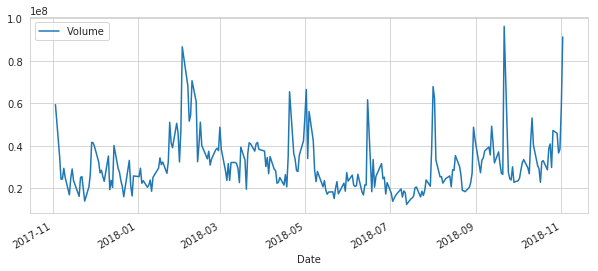

In [32]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [47]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma,center=False).mean()

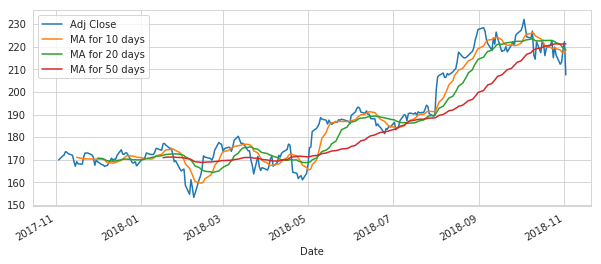

In [48]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

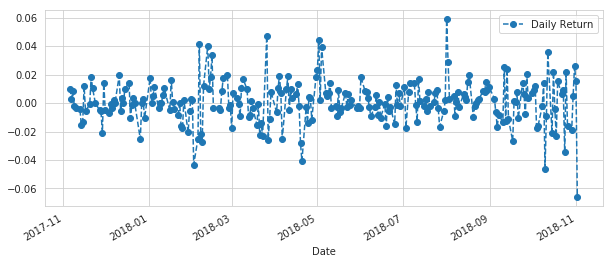

In [49]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

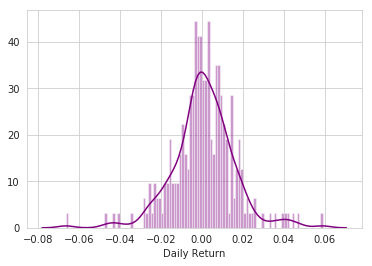

In [51]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

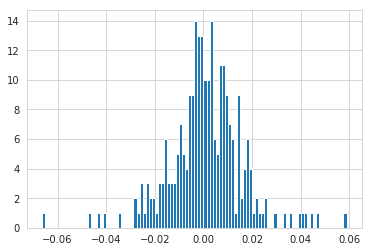

In [52]:
AAPL['Daily Return'].hist(bins=100)

In [53]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [54]:
closing_df.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,169.930634,1111.599976,1032.479980,82.650444
2017-11-06,171.654556,1120.660034,1025.900024,82.974594
2017-11-07,172.206223,1123.170044,1033.329956,82.778137
2017-11-08,173.614929,1132.880005,1039.849976,83.062996
2017-11-09,173.260300,1129.130005,1031.260010,82.601318


In [55]:
tech_rets = closing_df.pct_change()

In [56]:
tech_rets.head()


Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-11-03,NaN,NaN,NaN,NaN
2017-11-06,0.010145,0.008150,-0.006373,0.003922
2017-11-07,0.003214,0.002240,0.007242,-0.002368
2017-11-08,0.008180,0.008645,0.006310,0.003441
2017-11-09,-0.002043,-0.003310,-0.008261,-0.005558


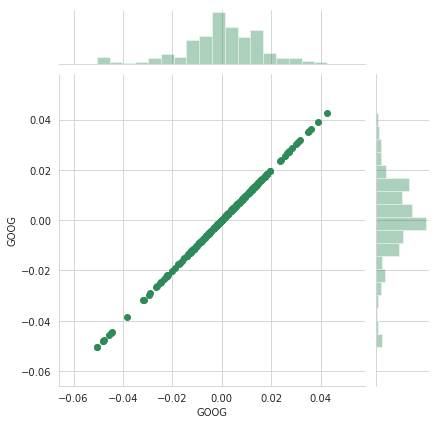

In [58]:
sns.jointplot('GOOG','GOOG',tech_rets,kind= 'scatter',color='seagreen')

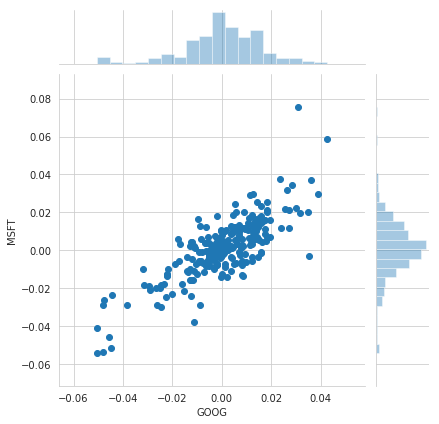

In [59]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

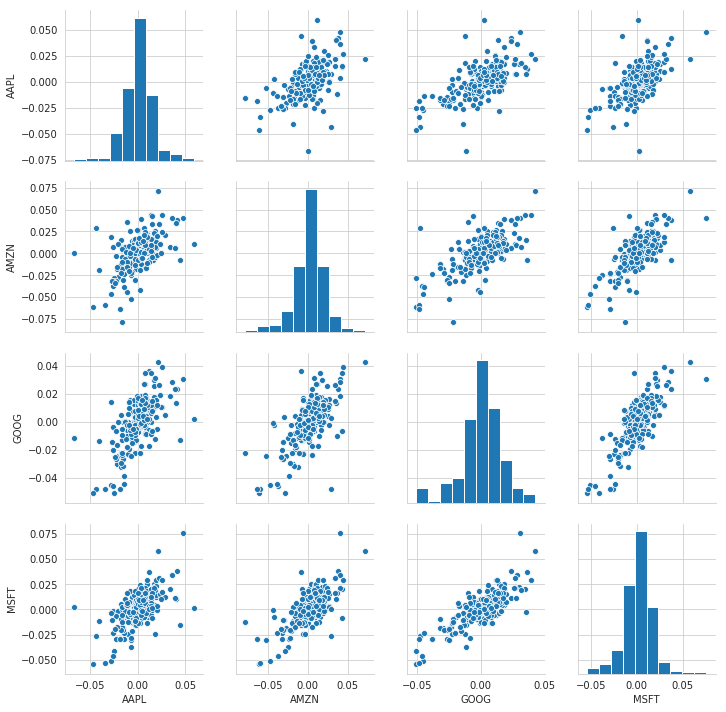

In [61]:
sns.pairplot(tech_rets.dropna())

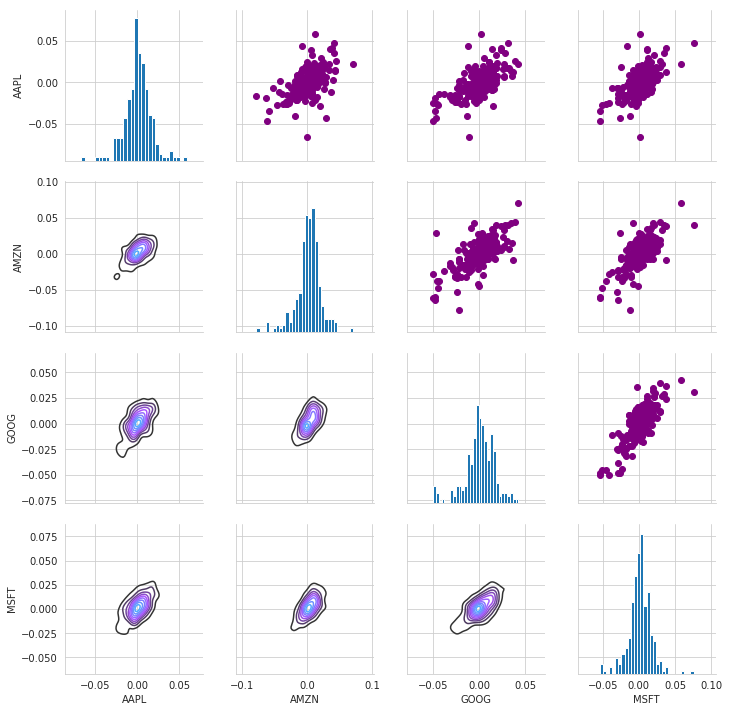

In [62]:
returns_fig = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

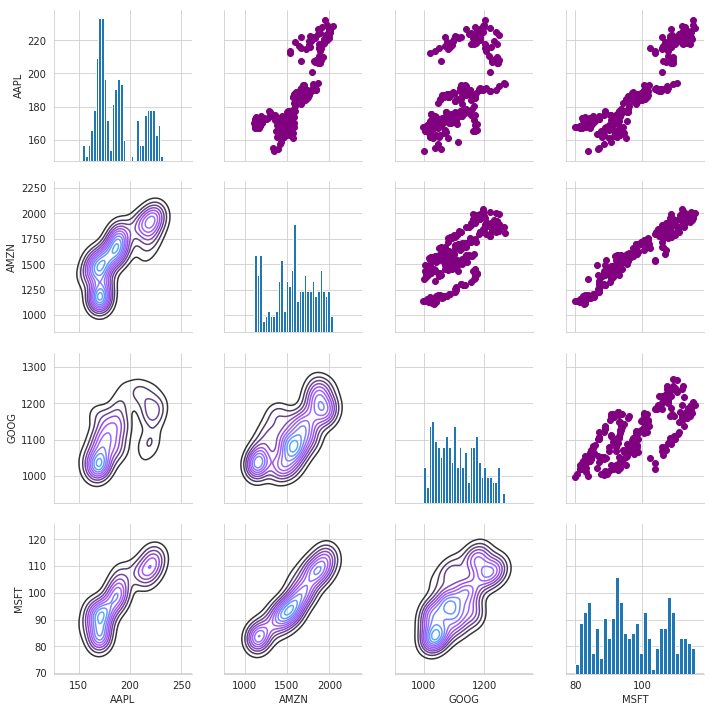

In [63]:
returns_fig = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

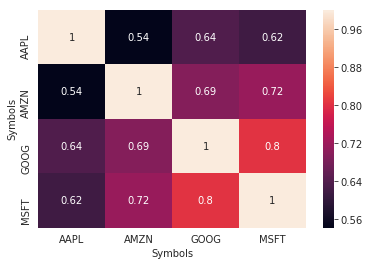

In [67]:
sns.heatmap(data=tech_rets.dropna().corr(),annot=True)

In [68]:
rets = tech_rets.dropna()

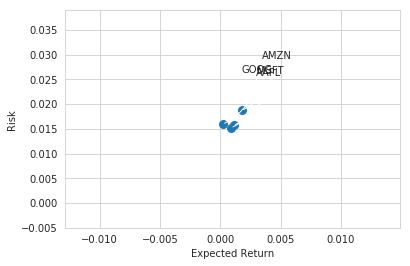

In [71]:
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va= 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))